# Introduction

Jackknifing is a simple yet powerful way of estimating the bias and standard error of an estimator. The jackknife estimates rely on leaving out one observation at a time. Compared to bootstrap, it should be possible to compute the jackknife estimate of the correlation and squared correlation much more easily.

# Math

Let $\hat{r}$ be the standard estimate of $r$. We will estimate $r^2$ with $\hat{r}^2$. Let $\hat{r}_{\left(i\right)}$ and $\hat{r}^2_{\left(i\right)}$ be the estimates of $r$ and $r^2$ with the $i$th sample removed. Let $\hat{r}_{\left(\cdot\right)}$ and $\hat{r}^2_{\left(\cdot\right)}$ be the mean of jacknife estimates. Then, $\hat{r}^2_{Jack}=n\hat{r}^2-\left(n-1\right)\hat{r}^2_{\left(\cdot\right)}$.

In [1]:
%run library.ipynb

In [2]:
def cor_jacknife(X):
    X2  = X**2
    X12 = X.prod(axis=1)

    Xsum   = X.sum(axis=0)
    X2sum  = X2.sum(axis=0)
    X12sum = X12.sum()
    
    Xisum   = Xsum[None, :] - X
    X2isum  = X2sum[None, :] - X2
    X12isum = X12sum - X12
    
    N = len(X12)
    
    r = (N*X12sum - Xsum.prod()) / np.sqrt((N*X2sum - Xsum**2).prod())
    ris = ((N-1)*X12isum - Xisum.prod(axis=1)) / np.sqrt(((N-1)*X2isum - Xisum**2).prod(axis=1))
    rimean = ris.mean()
    ri2mean = (ris**2).mean()
    
    return(r, r**2, rimean, ri2mean, N*r - (N-1)*rimean, N*(r**2) - (N-1)*ri2mean)

Run with $r=0$ to test at different M.

In [3]:
reps = 1000
Ns = [ 100, 1000, 10000 ]
Ys = np.array([
        [
            cor_jacknife(nr.normal(size=(N, 2)))
            for i in range(reps)
        ]
        for N in Ns
    ])

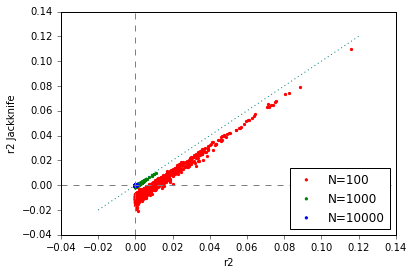

In [53]:
plt.scatter(Ys[0,:,1], Ys[0,:,5], marker='.', color='red',   label='N={}'.format(Ns[0]))
plt.scatter(Ys[1,:,1], Ys[1,:,5], marker='.', color='green', label='N={}'.format(Ns[1]))
plt.scatter(Ys[2,:,1], Ys[2,:,5], marker='.', color='blue',  label='N={}'.format(Ns[2]))
plt.legend(loc='lower right', scatterpoints=1)

plt.xlabel('r2')
plt.ylabel('r2 Jackknife')

ax = plt.gca()
ax.tick_params(direction='out', top='off', right='off')

ax.axvline(x=0, color='grey', ls='--')
ax.axhline(y=0, color='grey', ls='--')

plt.show()

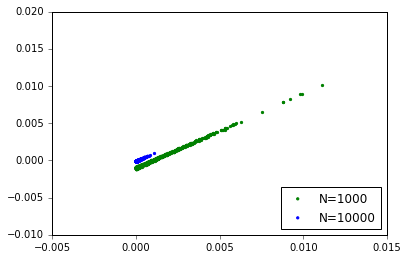

In [5]:
plt.scatter(Ys[1,:,1], Ys[1,:,5], marker='.', color='green', label='N={}'.format(Ns[1]))
plt.scatter(Ys[2,:,1], Ys[2,:,5], marker='.', color='blue',  label='N={}'.format(Ns[2]))
plt.legend(loc='lower right', scatterpoints=1)
ax = plt.gca()
ax.tick_params(direction='out', top='off', right='off')
plt.show()

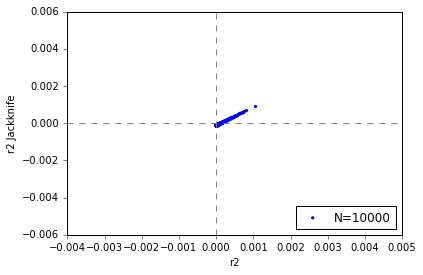

In [33]:
plt.scatter(Ys[2,:,1], Ys[2,:,5], marker='.', color='blue',  label='N={}'.format(Ns[2]))
plt.legend(loc='lower right', scatterpoints=1)
ax = plt.gca()
ax.tick_params(direction='out', top='off', right='off')


plt.xlabel('r2')
plt.ylabel('r2 Jackknife')

ax.axvline(x=0, color='grey', ls='--')
ax.axhline(y=0, color='grey', ls='--')

plt.show()

In [7]:
Ys.mean(axis=0).shape

(1000, 6)

In [8]:
Ys.shape

(3, 1000, 6)

In [9]:
Ys.mean(axis=1).reshape(3,3,2)

array([[[ -8.468e-04,   1.028e-02],
        [ -8.458e-04,   1.038e-02],
        [ -9.465e-04,   5.863e-05]],

       [[ -6.711e-04,   1.018e-03],
        [ -6.711e-04,   1.019e-03],
        [ -6.737e-04,   1.462e-05]],

       [[  4.770e-04,   9.648e-05],
        [  4.770e-04,   9.649e-05],
        [  4.771e-04,  -3.451e-06]]])

In [10]:
(Ys[:,:,5] < 0).sum(), (Ys[:,:,5] > 0).sum()

(2044, 956)

In [18]:
BSs = np.array([Y - (1-Y)/(N-2) for Y, N in zip(Ys[:,:,1], Ns)])

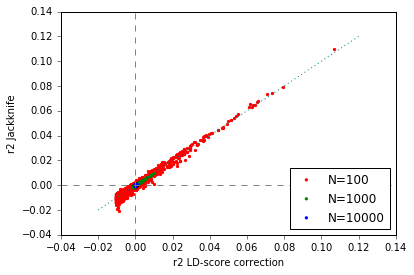

In [52]:
plt.scatter(BSs[0], Ys[0,:,5], marker='.', color='red',   label='N={}'.format(Ns[0]))
plt.scatter(BSs[1], Ys[1,:,5], marker='.', color='green', label='N={}'.format(Ns[1]))
plt.scatter(BSs[2], Ys[2,:,5], marker='.', color='blue',  label='N={}'.format(Ns[2]))

plt.legend(loc='lower right', scatterpoints=1)

ax = plt.gca()
ax.tick_params(direction='out', top='off', right='off')

plt.xlabel('r2 LD-score correction')
plt.ylabel('r2 Jackknife')

ax.axvline(x=0, color='grey', ls='--')
ax.axhline(y=0, color='grey', ls='--')

plt.plot([-.02,.12], [-.02,.12], ls=':', color='teal')

plt.show()

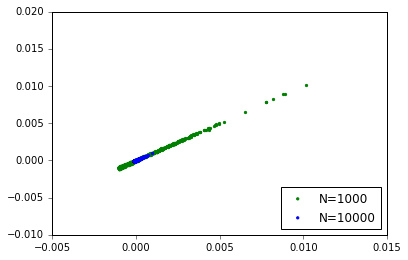

In [20]:
plt.scatter(BSs[1], Ys[1,:,5], marker='.', color='green', label='N={}'.format(Ns[1]))
plt.scatter(BSs[2], Ys[2,:,5], marker='.', color='blue',  label='N={}'.format(Ns[2]))
plt.legend(loc='lower right', scatterpoints=1)
ax = plt.gca()
ax.tick_params(direction='out', top='off', right='off')
plt.show()

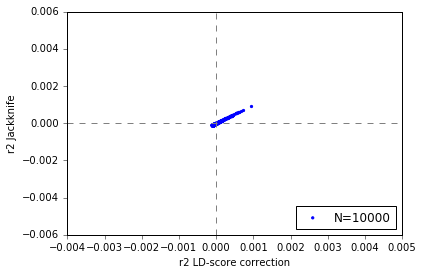

In [32]:
plt.scatter(BSs[2], Ys[2,:,5], marker='.', color='blue',  label='N={}'.format(Ns[2]))
plt.legend(loc='lower right', scatterpoints=1)

ax = plt.gca()
ax.tick_params(direction='out', top='off', right='off')

plt.xlabel('r2 LD-score correction')
plt.ylabel('r2 Jackknife')

ax.axvline(x=0, color='grey', ls='--')
ax.axhline(y=0, color='grey', ls='--')

plt.show()

In [34]:
from sklearn import linear_model

In [44]:
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(BSs[0,:,None], Ys[0,:,5])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
regr.intercept_, regr.coef_

(-0.000, array([ 1.02]))